# CHI 2023 

## Improving Human Compliance with Algorithmic Advice via Collaboration

In [177]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import json
from tqdm import tqdm
import ast

In [2]:
def set_pandas_display_options() -> None:
    """Set pandas display options."""
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed

set_pandas_display_options()

### Cleaning

In [3]:
data = pd.read_csv("data.csv").drop(83)

In [4]:
data["ResponseId"].to_csv("new_ids", index = False)

In [5]:
filtered = data[["id", "ResponseId",  "total_bonus" ]]

filtered.shape

(190, 3)

In [6]:
filtered = filtered.dropna(axis = "index", subset = "total_bonus")[2:]
bonus_subtracted = filtered["total_bonus"].astype(float)-1.4
filtered["total_bonus - 1.5"] = bonus_subtracted

In [7]:
filtered.to_csv("filtered", index = False)

In [8]:
data = data[34:]
data = data[data["Finished"] == "True"]

In [9]:
data = data.dropna(axis = "index", subset = "round_6_elapsed_time")

In [10]:
data.shape

(64, 288)

In [11]:
# to see the columns
data[:2]

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,id,consent,Q86_First Click,Q86_Last Click,Q86_Page Submit,Q86_Click Count,Q87_First Click,Q87_Last Click,Q87_Page Submit,Q87_Click Count,Q88_First Click,Q88_Last Click,Q88_Page Submit,Q88_Click Count,Q89_First Click,Q89_Last Click,Q89_Page Submit,Q89_Click Count,Q99_First Click,Q99_Last Click,Q99_Page Submit,Q99_Click Count,Q90_First Click,Q90_Last Click,Q90_Page Submit,Q90_Click Count,Q72,Q77,Q78,Q79,Q127_First Click,Q127_Last Click,Q127_Page Submit,Q127_Click Count,Q128_First Click,Q128_Last Click,Q128_Page Submit,Q128_Click Count,Q129_First Click,Q129_Last Click,Q129_Page Submit,Q129_Click Count,t11_First Click,t11_Last Click,t11_Page Submit,t11_Click Count,t12_First Click,t12_Last Click,t12_Page Submit,t12_Click Count,t13_First Click,t13_Last Click,t13_Page Submit,t13_Click Count,t21_First Click,t21_Last Click,t21_Page Submit,t21_Click Count,t22_First Click,t22_Last Click,t22_Page Submit,t22_Click Count,Q157_First Click,Q157_Last Click,Q157_Page Submit,Q157_Click Count,Q222,Q158_First Click,Q158_Last Click,Q158_Page Submit,Q158_Click Count,Q184,Q191,Q251_First Click,Q251_Last Click,Q251_Page Submit,Q251_Click Count,Q223,Q258_First Click,Q258_Last Click,Q258_Page Submit,Q258_Click Count,Q218,Q7,Q8,Q261_First Click,Q261_Last Click,Q261_Page Submit,Q261_Click Count,Q224,Q268_First Click,Q268_Last Click,Q268_Page Submit,Q268_Click Count,Q220,Q356,Q357,Q271_First Click,Q271_Last Click,Q271_Page Submit,Q271_Click Count,Q225,Q276_First Click,Q276_Last Click,Q276_Page Submit,Q276_Click Count,t63_First Click,t63_Last Click,t63_Page Submit,t63_Click Count,Q221,Q109_First Click,Q109_Last Click,Q109_Page Submit,Q109_Click Count,post_diff,post_tip_sentiment,post_tipviews_1,post_tipviews_2,post_tipviews_3,post_tipviews_4,post_tipviews_5,post_barriers_1,post_barriers_2,post_barriers_3,post_barriers_4,post_barriers_5,post_barriers_6,post_barriers_explai,post_style_change,post_style_process,post_style_decide,post_advice_normal,post_good_normal,post_best_normal,Q92_First Click,Q92_Last Click,Q92_Page Submit,Q92_Click Count,post_pre_disruption,post_saw_tip_disrupt,post_advice_disrupt,post_good_disrupt,post_best_disrupt,post_source_of_tip,post_source_switch,Q112_First Click,Q112_Last Click,Q112_Page Submit,Q112_Click Count,post_gender,post_gender_20_TEXT,post_age,post_edu,post_job,post_feedback,round_0_elapsed_time,round_0_config_id,round_0_actions,round_0_score,round_0_states,round_1_elapsed_time,round_1_actions,round_1_score,round_1_states,round_2_elapsed_time,round_2_actions,round_2_score,round_2_states,round_3_elapsed_time,round_3_actions,round_3_score,round_3_states,round_0_reward,round_1_reward,round_2_reward,round_3_reward,min_pay,max_pay,pay1,pay2,pay3,pay4,round_1_bonus,round_2_bonus,round_3_bonus,total_bonus,failedtraining,paymax,paymin,paymid,base_pay,chat_0,chat_1,chat_2,chat_3,tip_num,explanation_num,excluded,Create New Field or Choose From Dropdown...,round_0_tip,round_1_tip,round_2_tip,round_3_tip,round_4_tip,round_5_tip,round_6_tip,round_1_config_id,round_1_unit_reward,round_1_fin_tick,round_1_t1,round_1_t2,round_1_t3,round_1_t4,round_2_config_id,round_2_unit_reward,round_2_fin_tick,round_2_t1,round_2_t2,round_2_t3,round_2_t4,round_3_config_id,round_3_unit_reward,round_3_fin_tick,round_3_t1,round_3_t2,round_3_t3,round_3_t4,round_4_config_id,round_4_unit_reward,round_4_fin_tick,round_4_t1,round_4_t2,round_4_t3,round_4_t4,round_4_actions,round_4_states,round_4_score,round_4_reward,round_4_bonus,round_4_elapsed_time,round_5_config_id,round_5_unit_reward,round_5_fin_tick,round_5_t1,round_5_t2,round_5_t3,round_5_t4,round_5_actions,round_5_states,round_5_score,round_5_reward,round_5_bonus,round_5_elapsed_time,round_6_config_id,round_6_unit_reward,round_6_fin_tick,round_6_t1,round_6_t2,round_6_t3,rou

### Grouping

In [12]:
once_low_confidence = data[data["tip_num"] == "1"]
once_low_confidence = once_low_confidence[once_low_confidence["explanation_num"] == "1"]

In [13]:
twice_low_confidence = data[data["tip_num"] == "2"]
twice_low_confidence = twice_low_confidence[twice_low_confidence["explanation_num"] == "1"]

In [14]:
once_high_confidence = data[data["tip_num"] == "1"]
once_high_confidence = once_high_confidence[once_high_confidence["explanation_num"] == "2"]

In [15]:
twice_high_confidence = data[data["tip_num"] == "2"]
twice_high_confidence = twice_high_confidence[twice_high_confidence["explanation_num"] == "2"]

In [16]:
once_low_confidence.shape

(17, 288)

In [17]:
twice_low_confidence.shape

(12, 288)

In [18]:
once_high_confidence.shape

(19, 288)

In [19]:
twice_high_confidence.shape

(16, 288)

In [20]:
data = [once_low_confidence, twice_low_confidence, once_high_confidence, twice_high_confidence]

### Score Diff

In [21]:
def draw_time_distribution(num, num_round, legend):
    temp_series = pd.to_numeric(data[num]["round_" + str(num_round) + "_elapsed_time"]).values
    sns.distplot(temp_series, hist=False, rug=True, label = legend, ax = ax);


In [73]:
def draw_time_distributions(num_round):
    fig, ax = plt.subplots()
    draw_time_distribution(0, 6, "once_low_confidence")
    draw_time_distribution(1, 6, "twice_low_confidence")
    draw_time_distribution(2, 6, "once_high_confidence")
    draw_time_distribution(3, 6, "twice_high_confidence")
    plt.show()

/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarni

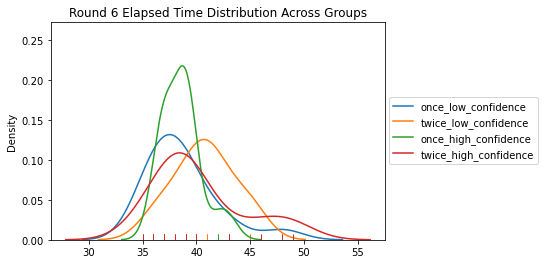

In [75]:
fig, ax = plt.subplots()
draw_time_distribution(0, 6, "once_low_confidence")
draw_time_distribution(1, 6, "twice_low_confidence")
draw_time_distribution(2, 6, "once_high_confidence")
draw_time_distribution(3, 6, "twice_high_confidence")
plt.legend(loc=(1.01,.35))
plt.title("Round 6 Elapsed Time Distribution Across Groups")
plt.show()


/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarni

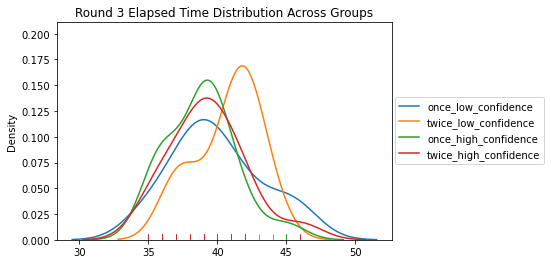

In [76]:
fig, ax = plt.subplots()
draw_time_distribution(0, 3, "once_low_confidence")
draw_time_distribution(1, 3, "twice_low_confidence")
draw_time_distribution(2, 3, "once_high_confidence")
draw_time_distribution(3, 3, "twice_high_confidence")
plt.legend(loc=(1.01,.35))
plt.title("Round 3 Elapsed Time Distribution Across Groups")
plt.show()

### Score Change

In [195]:
# num = 1
# legend = "as"
def draw_time_series(num, legend):
    performance = []
    for round_num in range(3,7):
        temp_series = pd.to_numeric(data[num]["round_" + str(round_num) + "_elapsed_time"]).values
        performance.append(temp_series)
    sns.lineplot(["round3", "round4", "round5", "round6"], performance, label = legend)

/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: unhashable type: 'numpy.ndarray'

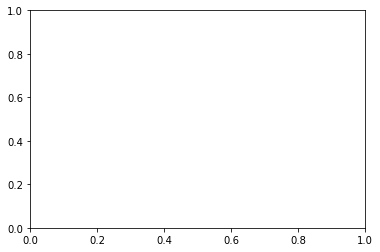

In [196]:
fig, ax = plt.subplots()
draw_time_series(0, "once_low_confidence")
draw_time_series(1, "twice_low_confidence")
draw_time_series(2, "once_high_confidence")
draw_time_series(3, "twice_high_confidence")
plt.legend(loc=(1.01,.35))
plt.title("Change of Average Elapsed Time Across Rounds Across Groups")
plt.show()

### Willingness to follow

In [78]:
once_low_confidence["Q222"]

49     Yes, I intend to follow the tip in this round
51     Yes, I intend to follow the tip in this round
57     Yes, I intend to follow the tip in this round
58     Yes, I intend to follow the tip in this round
61     Yes, I intend to follow the tip in this round
63               Maybe, I'll keep it in mind and see
68     Yes, I intend to follow the tip in this round
90     Yes, I intend to follow the tip in this round
105    Yes, I intend to follow the tip in this round
107              Maybe, I'll keep it in mind and see
108              Maybe, I'll keep it in mind and see
150              Maybe, I'll keep it in mind and see
152    Yes, I intend to follow the tip in this round
166    Yes, I intend to follow the tip in this round
170    Yes, I intend to follow the tip in this round
172    Yes, I intend to follow the tip in this round
176    Yes, I intend to follow the tip in this round
Name: Q222, dtype: object

In [133]:
yes = "Yes, I intend to follow the tip in this round"
maybe = "Maybe, I'll keep it in mind and see"
no = "No, I don't plan to follow the suggested tip this round"

In [136]:
# range -1 to 1
def willingness_scale(dataframe, num):
    questions = ["Q222", "Q223", "Q224", "Q225"]
    return (sum(dataframe[questions[num]] == yes) - sum(dataframe[questions[num]] == no)) / len(dataframe[questions[num]])

In [137]:
willingness_scale(once_low_confidence, 2)

0.4117647058823529

In [185]:
def draw_willingness_time_series(num, legend):
    willingness = []
    for round_num in range(4):
        willingness.append(willingness_scale(data[num], round_num))
#     sns.lineplot(["round3", "round4", "round5", "round6"], willingness, label = legend)
    return willingness

/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


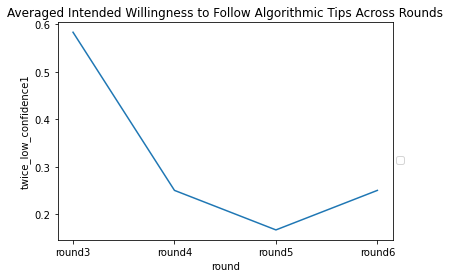

In [194]:
fig, ax = plt.subplots()
new_df = pd.DataFrame()
twice_low_confidence1 = draw_willingness_time_series(0, "once_low_confidence")
twice_low_confidence1 = draw_willingness_time_series(1, "twice_low_confidence")
once_high_confidence1 = draw_willingness_time_series(2, "once_high_confidence")
twice_high_confidence1 = draw_willingness_time_series(3, "twice_high_confidence")
new_df["round"] = ["round3", "round4", "round5", "round6"]
new_df["twice_low_confidence"] = twice_low_confidence1
new_df["twice_low_confidence1"] = twice_low_confidence1
new_df["once_high_confidence1"] = once_high_confidence1
new_df["twice_high_confidence1"] = twice_high_confidence1
sns.lineplot("round", "twice_low_confidence1", data=new_df, ci = 95)
plt.legend(loc=(1.01,.35))
plt.title("Averaged Intended Willingness to Follow Algorithmic Tips Across Rounds")
plt.show()

In [84]:
twice_low_confidence

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,id,consent,Q86_First Click,Q86_Last Click,Q86_Page Submit,Q86_Click Count,Q87_First Click,Q87_Last Click,Q87_Page Submit,Q87_Click Count,Q88_First Click,Q88_Last Click,Q88_Page Submit,Q88_Click Count,Q89_First Click,Q89_Last Click,Q89_Page Submit,Q89_Click Count,Q99_First Click,Q99_Last Click,Q99_Page Submit,Q99_Click Count,Q90_First Click,Q90_Last Click,Q90_Page Submit,Q90_Click Count,Q72,Q77,Q78,Q79,Q127_First Click,Q127_Last Click,Q127_Page Submit,Q127_Click Count,Q128_First Click,Q128_Last Click,Q128_Page Submit,Q128_Click Count,Q129_First Click,Q129_Last Click,Q129_Page Submit,Q129_Click Count,t11_First Click,t11_Last Click,t11_Page Submit,t11_Click Count,t12_First Click,t12_Last Click,t12_Page Submit,t12_Click Count,t13_First Click,t13_Last Click,t13_Page Submit,t13_Click Count,t21_First Click,t21_Last Click,t21_Page Submit,t21_Click Count,t22_First Click,t22_Last Click,t22_Page Submit,t22_Click Count,Q157_First Click,Q157_Last Click,Q157_Page Submit,Q157_Click Count,Q222,Q158_First Click,Q158_Last Click,Q158_Page Submit,Q158_Click Count,Q184,Q191,Q251_First Click,Q251_Last Click,Q251_Page Submit,Q251_Click Count,Q223,Q258_First Click,Q258_Last Click,Q258_Page Submit,Q258_Click Count,Q218,Q7,Q8,Q261_First Click,Q261_Last Click,Q261_Page Submit,Q261_Click Count,Q224,Q268_First Click,Q268_Last Click,Q268_Page Submit,Q268_Click Count,Q220,Q356,Q357,Q271_First Click,Q271_Last Click,Q271_Page Submit,Q271_Click Count,Q225,Q276_First Click,Q276_Last Click,Q276_Page Submit,Q276_Click Count,t63_First Click,t63_Last Click,t63_Page Submit,t63_Click Count,Q221,Q109_First Click,Q109_Last Click,Q109_Page Submit,Q109_Click Count,post_diff,post_tip_sentiment,post_tipviews_1,post_tipviews_2,post_tipviews_3,post_tipviews_4,post_tipviews_5,post_barriers_1,post_barriers_2,post_barriers_3,post_barriers_4,post_barriers_5,post_barriers_6,post_barriers_explai,post_style_change,post_style_process,post_style_decide,post_advice_normal,post_good_normal,post_best_normal,Q92_First Click,Q92_Last Click,Q92_Page Submit,Q92_Click Count,post_pre_disruption,post_saw_tip_disrupt,post_advice_disrupt,post_good_disrupt,post_best_disrupt,post_source_of_tip,post_source_switch,Q112_First Click,Q112_Last Click,Q112_Page Submit,Q112_Click Count,post_gender,post_gender_20_TEXT,post_age,post_edu,post_job,post_feedback,round_0_elapsed_time,round_0_config_id,round_0_actions,round_0_score,round_0_states,round_1_elapsed_time,round_1_actions,round_1_score,round_1_states,round_2_elapsed_time,round_2_actions,round_2_score,round_2_states,round_3_elapsed_time,round_3_actions,round_3_score,round_3_states,round_0_reward,round_1_reward,round_2_reward,round_3_reward,min_pay,max_pay,pay1,pay2,pay3,pay4,round_1_bonus,round_2_bonus,round_3_bonus,total_bonus,failedtraining,paymax,paymin,paymid,base_pay,chat_0,chat_1,chat_2,chat_3,tip_num,explanation_num,excluded,Create New Field or Choose From Dropdown...,round_0_tip,round_1_tip,round_2_tip,round_3_tip,round_4_tip,round_5_tip,round_6_tip,round_1_config_id,round_1_unit_reward,round_1_fin_tick,round_1_t1,round_1_t2,round_1_t3,round_1_t4,round_2_config_id,round_2_unit_reward,round_2_fin_tick,round_2_t1,round_2_t2,round_2_t3,round_2_t4,round_3_config_id,round_3_unit_reward,round_3_fin_tick,round_3_t1,round_3_t2,round_3_t3,round_3_t4,round_4_config_id,round_4_unit_reward,round_4_fin_tick,round_4_t1,round_4_t2,round_4_t3,round_4_t4,round_4_actions,round_4_states,round_4_score,round_4_reward,round_4_bonus,round_4_elapsed_time,round_5_config_id,round_5_unit_reward,round_5_fin_tick,round_5_t1,round_5_t2,round_5_t3,round_5_t4,round_5_actions,round_5_states,round_5_score,round_5_reward,round_5_bonus,round_5_elapsed_time,round_6_config_id,round_6_unit_reward,round_6_fin_tick,round_6_t1,round_6_t2,round_6_t3,rou

### Suggested Tip Change

In [85]:
def suggested_tip(dataframe, num):
    questions = ["Q184", "Q7", "Q356"]
    return np.mean(dataframe[questions[num]].astype(int))

In [86]:
suggested_tip(once_low_confidence, 2)

1.7647058823529411

In [87]:
def draw_suggested_tip_time_series(num, legend):
    tips = []
    for round_num in range(3):
        tips.append(suggested_tip(data[num], round_num))
    sns.lineplot(["round3", "round4", "round5"], tips, label = legend)

/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

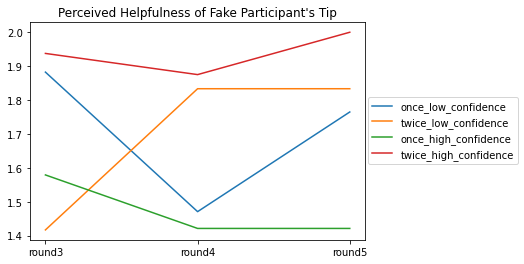

In [150]:
fig, ax = plt.subplots()
draw_suggested_tip_time_series(0, "once_low_confidence")
draw_suggested_tip_time_series(1, "twice_low_confidence")
draw_suggested_tip_time_series(2, "once_high_confidence")
draw_suggested_tip_time_series(3, "twice_high_confidence")
plt.legend(loc=(1.01,.35))
plt.title("Perceived Helpfulness of Fake Participant's Tip")
plt.show()

### Peer Helpfulness Change

In [156]:
very = "It's very helpful"
barely = "It barely helps"
not_help = "It's not helpful at all"
not_sure = "I am not sure"

In [157]:
# range -1 to 1
def peer_helpful_scale(dataframe, num):
    questions = ["Q218", "Q220", "Q221"]
    return (sum(dataframe[questions[num]] == very) - sum(dataframe[questions[num]] == not_help)) / len(dataframe[[questions[num]]])

In [158]:
peer_helpful_scale(once_low_confidence, 2)

0.23529411764705882

In [179]:
def draw_helpfulness_time_series(num, legend):
    willingness = []
    for round_num in range(3):
        willingness.append(peer_helpful_scale(data[num], round_num))
    sns.lineplot(["round4", "round5", "round6"], willingness, label = legend, ci = "sd", err_style="bars")

/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/stephen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretatio

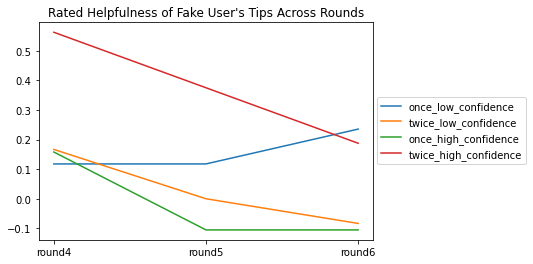

In [180]:
fig, ax = plt.subplots()
draw_helpfulness_time_series(0, "once_low_confidence")
draw_helpfulness_time_series(1, "twice_low_confidence")
draw_helpfulness_time_series(2, "once_high_confidence")
draw_helpfulness_time_series(3, "twice_high_confidence")

plt.legend(loc=(1.01,.35))
plt.title("Rated Helpfulness of Fake User's Tips Across Rounds")
plt.show()

### Actual Assigned Server

In [132]:


# 0~chef, 1~sou_chef, 2~server
# 99 ~ available, 100 ~ finished
final12 = pd.DataFrame()
for round in ["round_1_states", "round_2_states"]:
  out = pd.DataFrame()
  ID = data[0]["ResponseId"]
  for kim in tqdm(np.arange(len(ID))):
    zzx = pd.DataFrame(json.loads(data[0][round][kim]))
    chef_order = [state[0]["order_index"] for state in zzx["worker_states"]]
    chef_task = [state[0]["task"] for state in zzx["worker_states"]]
    chef_left_ticks = [state[0]["ticks"] for state in zzx["worker_states"]]

    sou_chef_order = [state[1]["order_index"] for state in zzx["worker_states"]]
    sou_chef_task = [state[1]["task"] for state in zzx["worker_states"]]
    sou_chef_left_ticks = [state[1]["ticks"] for state in zzx["worker_states"]]

    server_order = [state[2]["order_index"] for state in zzx["worker_states"]]
    server_task = [state[2]["task"] for state in zzx["worker_states"]]
    server_left_ticks = [state[2]["ticks"] for state in zzx["worker_states"]]

    ticks = np.arange(len(chef_order))

    # t01, order 0, task 1, 12 in total 
    t00 = ["available"] * len(ticks)
    t01 = ["unavailable"] * len(ticks)
    t02 = ["unavailable"] * len(ticks)

    t10 = ["available"] * len(ticks)
    t11 = ["unavailable"] * len(ticks)
    t12 = ["unavailable"] * len(ticks)

    t20 = ["available"] * len(ticks)
    t21 = ["unavailable"] * len(ticks)
    t22 = ["unavailable"] * len(ticks)

    t30 = ["available"] * len(ticks)
    t31 = ["unavailable"] * len(ticks)
    t32 = ["unavailable"] * len(ticks)

    matrix = [[t00, t01, t02], [t10, t11, t12], [t20, t21, t22], [t30, t31, t32]]

    i = 0
    for i in np.arange(len(ticks)):
      order_chef = chef_order[i]
      task_chef = chef_task[i]
      if order_chef != None and task_chef != None:
        matrix[order_chef][task_chef][i] = "chef"

        for jisoo in np.arange(2):
          if task_chef == jisoo and chef_left_ticks[i] == 1:
            new1 = matrix[order_chef][jisoo+1][:i+1]
            new2 = ["available"]*(len(ticks) - i - 1)
            matrix[order_chef][jisoo+1] = new1 + new2

        for mmy in np.arange(3):
          if task_chef == mmy and chef_left_ticks[i] == 1:
            new1 = matrix[order_chef][mmy][:i+1]
            new2 = ["finished"]*(len(ticks) - i - 1)
            matrix[order_chef][mmy] = new1 + new2

      order_sou_chef = sou_chef_order[i]
      task_sou_chef = sou_chef_task[i]
      if order_sou_chef != None and task_sou_chef != None:
        matrix[order_sou_chef][task_sou_chef][i] = "sou_chef"

        for jisoo in np.arange(2):
          if task_sou_chef == jisoo and sou_chef_left_ticks[i] == 1:
            new1 = matrix[order_sou_chef][jisoo+1][:i+1]
            new2 = ["available"]*(len(ticks) - i - 1)
            matrix[order_sou_chef][jisoo+1] = new1 + new2


        for mmy in np.arange(3):
          if task_sou_chef == mmy and sou_chef_left_ticks[i] == 1:
            new1 = matrix[order_sou_chef][mmy][:i+1]
            new2 = ["finished"]*(len(ticks) - i - 1)
            matrix[order_sou_chef][mmy] = new1 + new2


      order_server = server_order[i]
      task_server = server_task[i]
      if order_server != None and task_server != None:
        matrix[order_server][task_server][i] = "server"

        for jisoo in np.arange(2):
          if task_server == jisoo and server_left_ticks[i] == 1:
            new1 = matrix[order_server][jisoo+1][:i+1]
            new2 = ["available"]*(len(ticks) - i - 1)
            matrix[order_server][jisoo+1] = new1 + new2

        for mmy in np.arange(3):
          if task_server == mmy and server_left_ticks[i] == 1:
            new1 = matrix[order_server][mmy][:i+1]
            new2 = ["finished"]*(len(ticks) - i - 1)
            matrix[order_server][mmy] = new1 + new2


    player = pd.DataFrame()
    player["ID"] = [ID[kim]] * len(ticks)
    player["round"] = [round] * len(ticks)
    player["chef_order"] = chef_order
    player["chef_task"] = chef_task
    player["chef_left_ticks"] = chef_left_ticks
    player["sou_chef_order"] = sou_chef_order
    player["sou_chef_task"] = sou_chef_task
    player["sou_chef_left_ticks"] = sou_chef_left_ticks
    player["server_order"] = server_order
    player["server_task"] = server_task
    player["server_left_ticks"] = server_left_ticks
    player["ticks"] = ticks
    player["order0_task0"] = matrix[0][0]
    player["order0_task1"] = matrix[0][1]
    player["order0_task2"] = matrix[0][2]
    player["order1_task0"] = matrix[1][0]
    player["order1_task1"] = matrix[1][1]
    player["order1_task2"] = matrix[1][2]
    player["order2_task0"] = matrix[2][0]
    player["order2_task1"] = matrix[2][1]
    player["order2_task2"] = matrix[2][2]
    player["order3_task0"] = matrix[3][0]
    player["order3_task1"] = matrix[3][1]
    player["order3_task2"] = matrix[3][2]

    out = pd.concat([out, player])
  final12 = pd.concat([final12, out])

final12

  0%|                                                                | 0/17 [00:00<?, ?it/s]


KeyError: 0

In [128]:
json_dict = json.loads(data[0]["round_4_actions"][49])

In [129]:
all_data = allaction(data[0])
all_data.parse()

  0%|                                                               | 0/288 [00:00<?, ?it/s]

[{'order_index': 0, 'task': 0, 'worker_index': 0}, {'order_index': 1, 'task': 0, 'worker_index': 1}]


TypeError: list indices must be integers or slices, not str